In [5]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots prettier
plt.style.use("seaborn-whitegrid")
sns.set_palette("Set2")

# 2. Load Dataset
train = pd.read_csv("../DATA/train_v9rqX0R.csv")
test = pd.read_csv("../DATA/test_AbJTz2l.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (8523, 12)
Test shape: (5681, 11)


C:\Users\rajud\AppData\Local\Temp\ipykernel_16512\3222468913.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
# Step 1 — Structure summary for all columns
def structure_summary(df):
    s = pd.DataFrame({
        "dtype": df.dtypes,
        "n_missing": df.isna().sum(),
        "pct_missing": (df.isna().mean()*100).round(2),
        "n_unique": df.nunique()
    }).sort_index()
    return s

summary = structure_summary(train)
display(summary)


,dtype,n_missing,pct_missing,n_unique
Item_Fat_Content,object,0,0.00,5
Item_Identifier,object,0,0.00,1559
Item_MRP,float64,0,0.00,5938
Item_Outlet_Sales,float64,0,0.00,3493
Item_Type,object,0,0.00,16
Item_Visibility,float64,0,0.00,7880
Item_Weight,float64,1463,17.17,415
Outlet_Establishment_Year,int64,0,0.00,9
Outlet_Identifier,object,0,0.00,10
Outlet_Location_Type,object,0,0.00,3


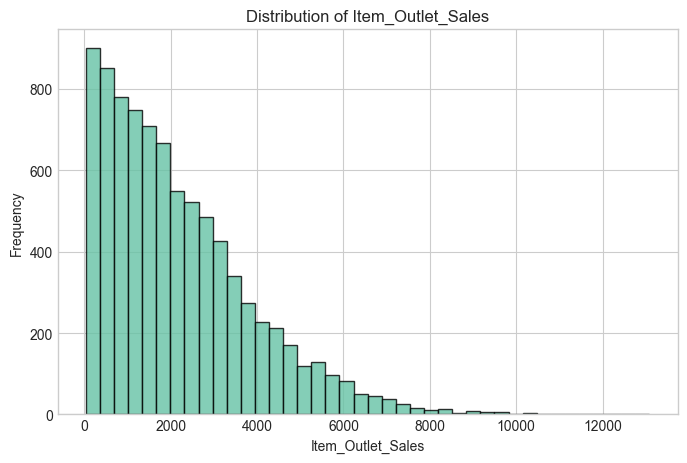

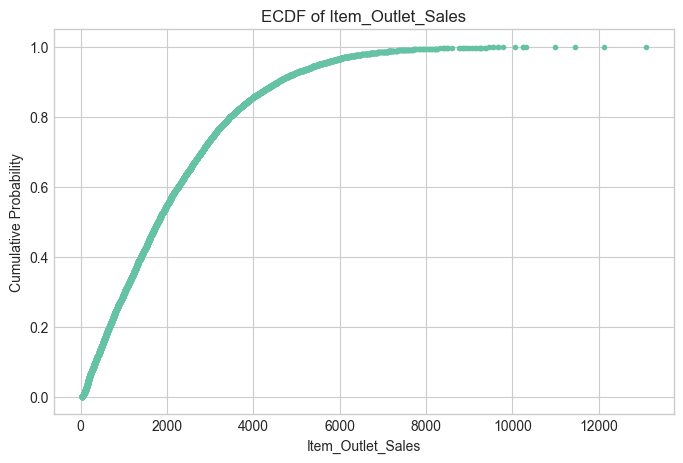

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
10%        343.552800
25%        834.247400
50%       1794.331000
75%       3101.296400
90%       4570.051200
max      13086.964800
dtype: float64
Skewness: 1.1775306028542796


In [10]:
# Step 2 — Target deep-dive (Item_Outlet_Sales): histogram + ECDF + quick stats
y = pd.to_numeric(train["Item_Outlet_Sales"], errors="coerce").dropna().to_numpy()

# Histogram (Y label = Frequency)
plt.figure(figsize=(8,5))
plt.hist(y, bins=40, edgecolor="black", alpha=0.8)
plt.title("Distribution of Item_Outlet_Sales")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()

# ECDF (no seaborn)
def plot_ecdf(vals, title="ECDF"):
    vals = np.asarray(vals)
    x = np.sort(vals)
    y = np.arange(1, len(x)+1) / len(x)
    plt.figure(figsize=(8,5))
    plt.plot(x, y, marker=".", linestyle="none")
    plt.title(title)
    plt.xlabel("Item_Outlet_Sales")
    plt.ylabel("Cumulative Probability")
    plt.show()

plot_ecdf(y, title="ECDF of Item_Outlet_Sales")

# Quick stats (no conclusions yet)
print(pd.Series(y).describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
print("Skewness:", pd.Series(y).skew())


In [11]:
# Step 3 — Split columns
target_col = "Item_Outlet_Sales"
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols     = train.select_dtypes(exclude=[np.number]).columns.tolist()

# Ensure target in numeric_cols if present
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print("Numeric features:", numeric_cols)
print("Categorical features:", cat_cols)


Numeric features: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
Categorical features: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


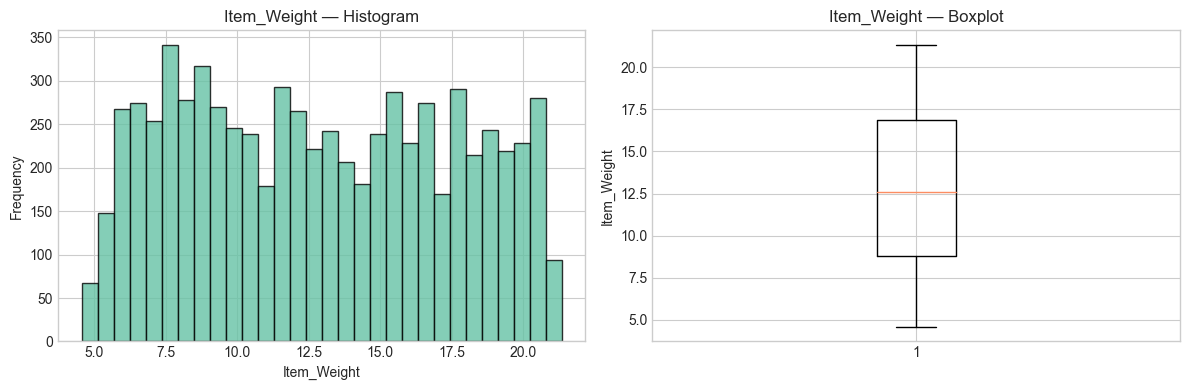

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
10%,6.695000
25%,8.773750
50%,12.600000
75%,16.850000
90%,19.350000
max,21.350000


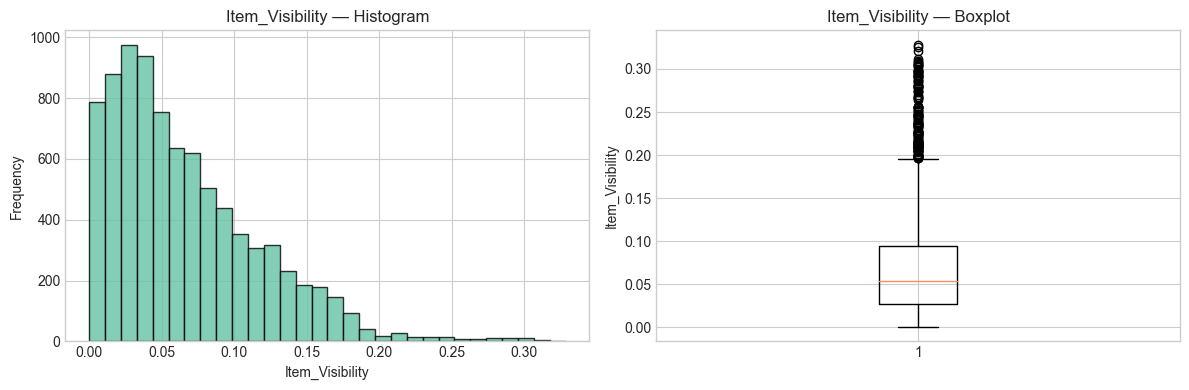

,Item_Visibility
count,8523.000000
mean,0.066132
std,0.051598
min,0.000000
10%,0.012042
25%,0.026989
50%,0.053931
75%,0.094585
90%,0.139514
max,0.328391


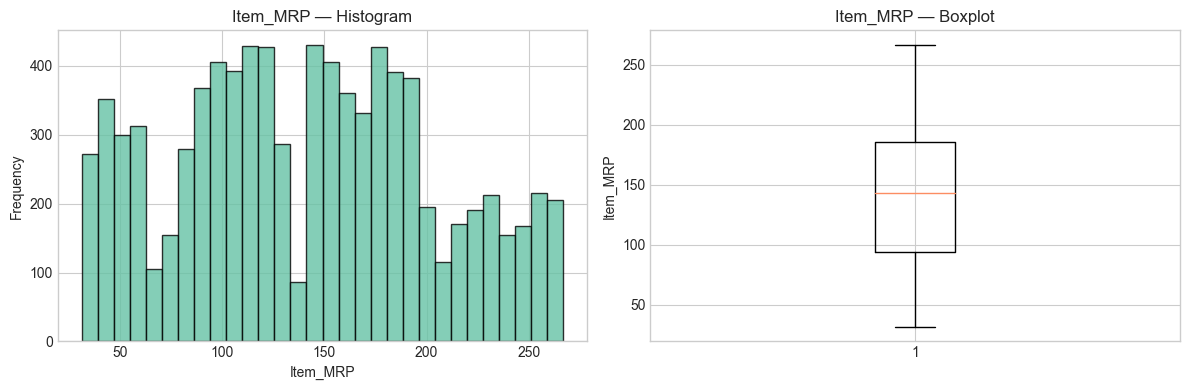

,Item_MRP
count,8523.000000
mean,140.992782
std,62.275067
min,31.290000
10%,52.795600
25%,93.826500
50%,143.012800
75%,185.643700
90%,231.200480
max,266.888400


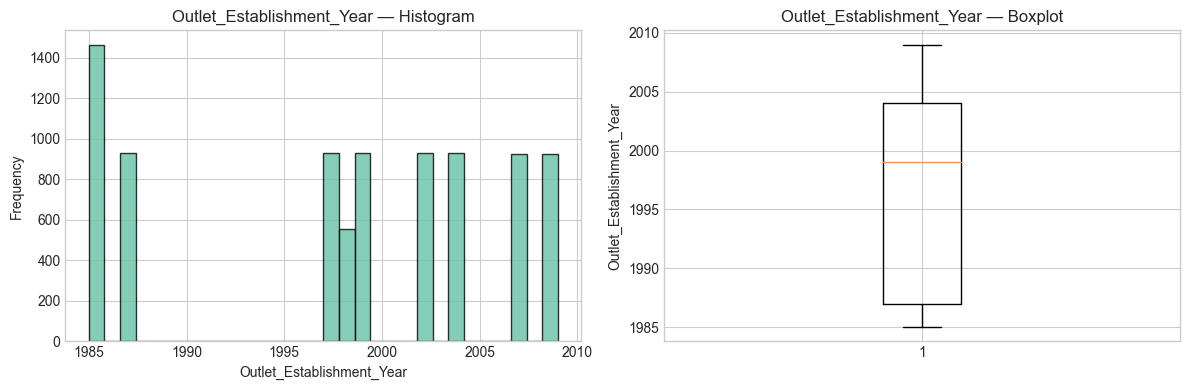

,Outlet_Establishment_Year
count,8523.000000
mean,1997.831867
std,8.371760
min,1985.000000
10%,1985.000000
25%,1987.000000
50%,1999.000000
75%,2004.000000
90%,2009.000000
max,2009.000000


In [12]:
# Step 4 — Univariate numeric features (robust matplotlib)
def plot_numeric_univariate(df, col, bins=30):
    s = pd.to_numeric(df[col], errors="coerce").dropna()
    if s.empty:
        print(f"[{col}] — no numeric data after coercion, skipping.")
        return
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    # Histogram
    axes[0].hist(s, bins=bins, edgecolor="black", alpha=0.8)
    axes[0].set_title(f"{col} — Histogram")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    # Boxplot
    axes[1].boxplot(s, vert=True, showfliers=True)
    axes[1].set_title(f"{col} — Boxplot")
    axes[1].set_ylabel(col)
    plt.tight_layout()
    plt.show()
    # Quick stats
    display(s.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).to_frame(col))

for col in numeric_cols:
    plot_numeric_univariate(train, col)


,category,count,pct
0,FDW13,10,0.12
1,FDG33,10,0.12
2,NCY18,9,0.11
3,FDD38,9,0.11
4,DRE49,9,0.11
5,FDV60,9,0.11
6,NCQ06,9,0.11
7,FDF52,9,0.11
8,FDX04,9,0.11
9,NCJ30,9,0.11


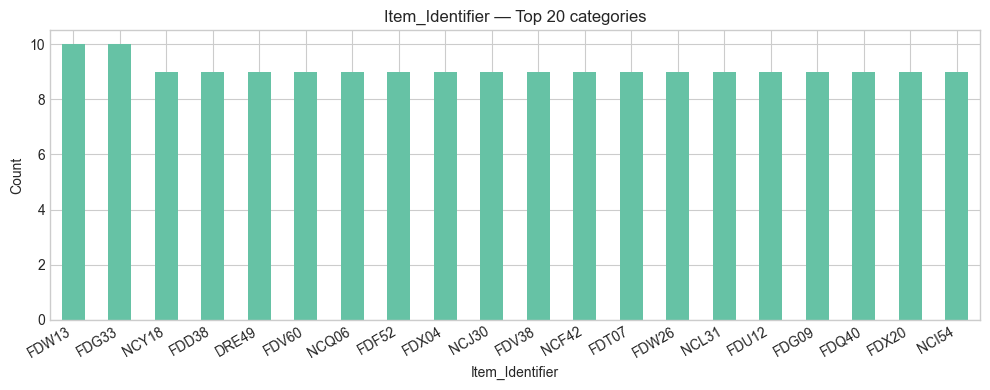

,category,count,pct
0,Low Fat,5089,59.71
1,Regular,2889,33.90
2,LF,316,3.71
3,reg,117,1.37
4,low fat,112,1.31


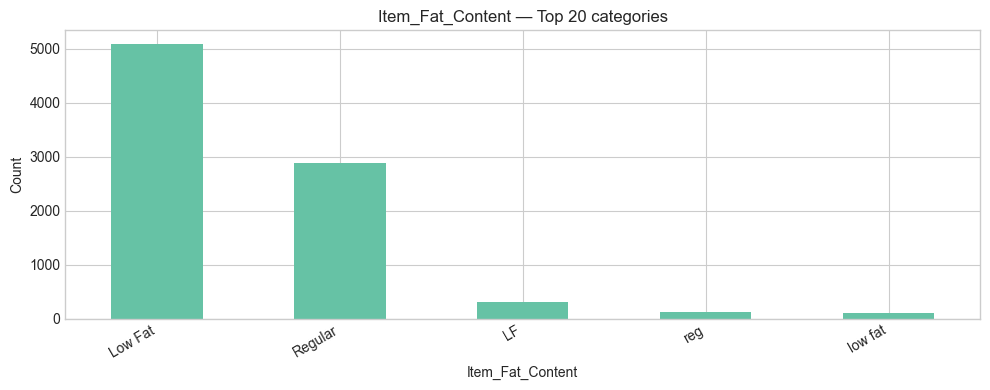

,category,count,pct
0,Fruits and Vegetables,1232,14.46
1,Snack Foods,1200,14.08
2,Household,910,10.68
3,Frozen Foods,856,10.04
4,Dairy,682,8.00
5,Canned,649,7.61
6,Baking Goods,648,7.60
7,Health and Hygiene,520,6.10
8,Soft Drinks,445,5.22
9,Meat,425,4.99


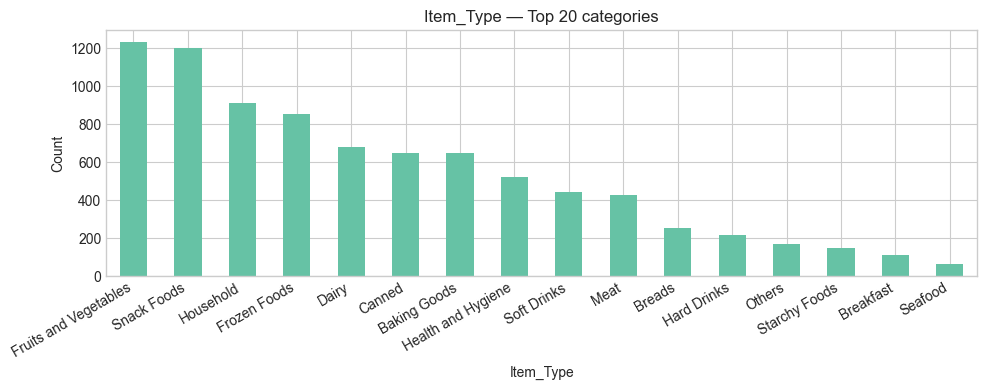

,category,count,pct
0,OUT027,935,10.97
1,OUT013,932,10.94
2,OUT049,930,10.91
3,OUT046,930,10.91
4,OUT035,930,10.91
5,OUT045,929,10.90
6,OUT018,928,10.89
7,OUT017,926,10.86
8,OUT010,555,6.51
9,OUT019,528,6.20


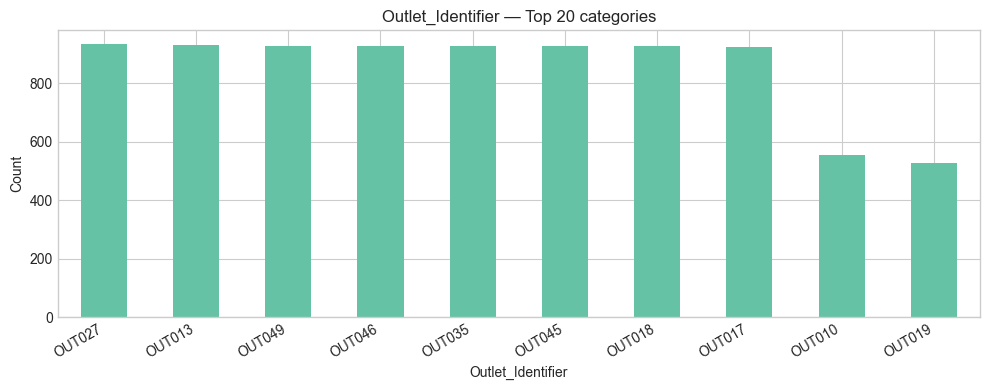

,category,count,pct
0,Medium,2793,32.77
1,<<MISSING>>,2410,28.28
2,Small,2388,28.02
3,High,932,10.94


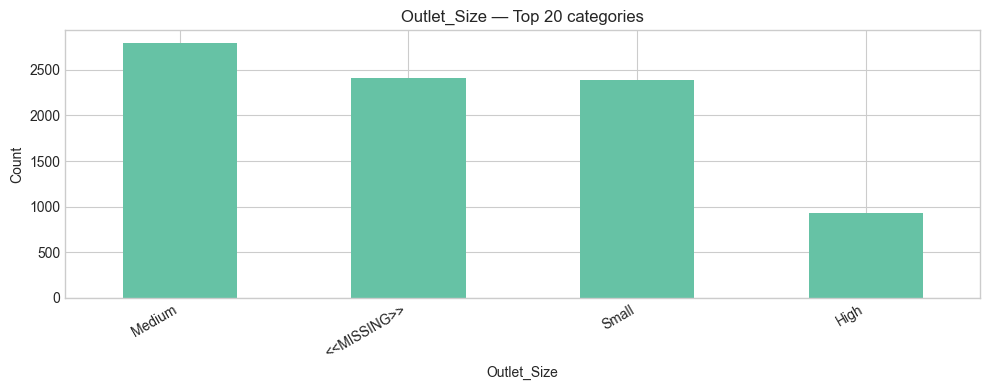

,category,count,pct
0,Tier 3,3350,39.31
1,Tier 2,2785,32.68
2,Tier 1,2388,28.02


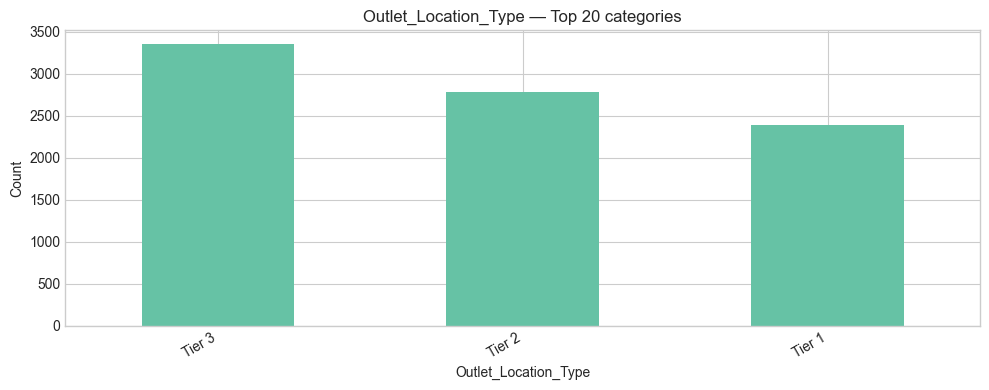

,category,count,pct
0,Supermarket Type1,5577,65.43
1,Grocery Store,1083,12.71
2,Supermarket Type3,935,10.97
3,Supermarket Type2,928,10.89


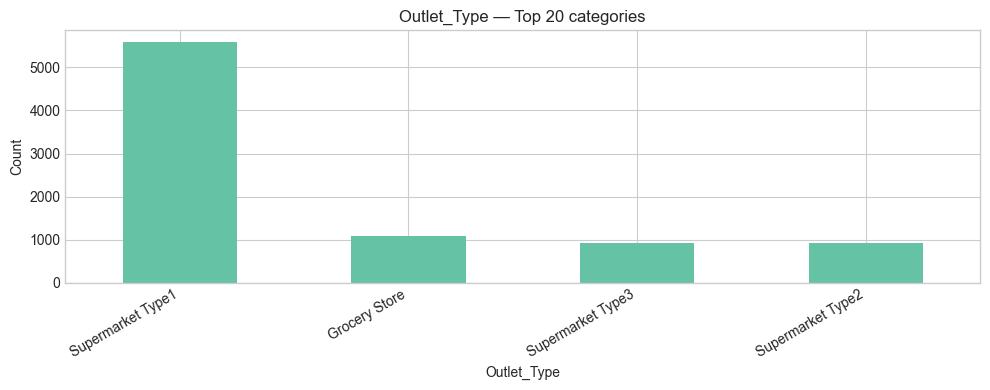

In [13]:
# Step 5 — Univariate categorical features
def plot_categorical_univariate(df, col, top_n=20):
    vc = df[col].astype("object").fillna("<<MISSING>>").value_counts(dropna=False)
    head_vc = vc.head(top_n)
    # Table
    display(pd.DataFrame({
        "category": head_vc.index,
        "count": head_vc.values,
        "pct": (head_vc.values / len(df) * 100).round(2)
    }))
    # Bar chart
    plt.figure(figsize=(10,4))
    head_vc.plot(kind="bar")
    plt.title(f"{col} — Top {top_n} categories")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

for col in cat_cols:
    plot_categorical_univariate(train, col, top_n=20)


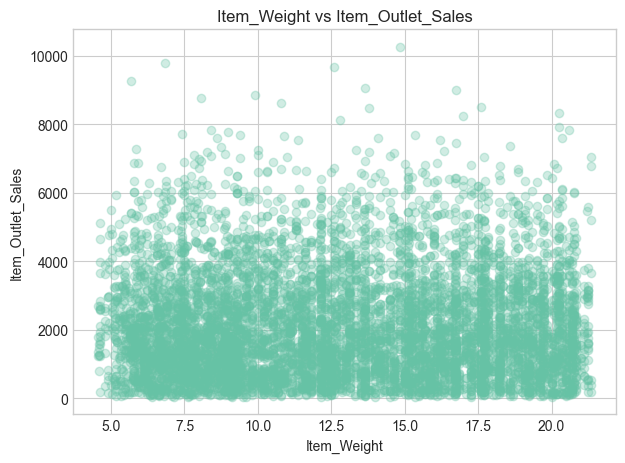

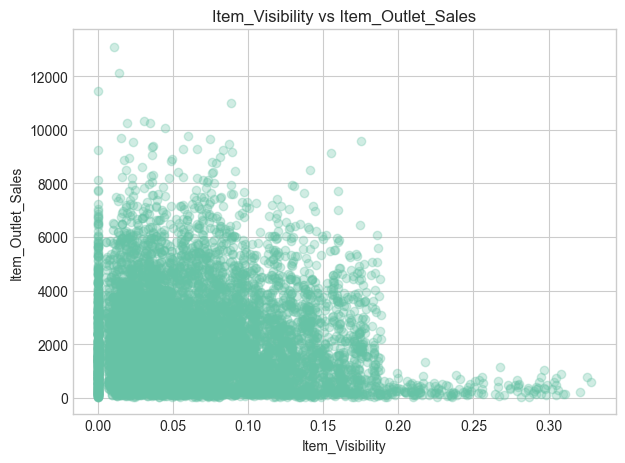

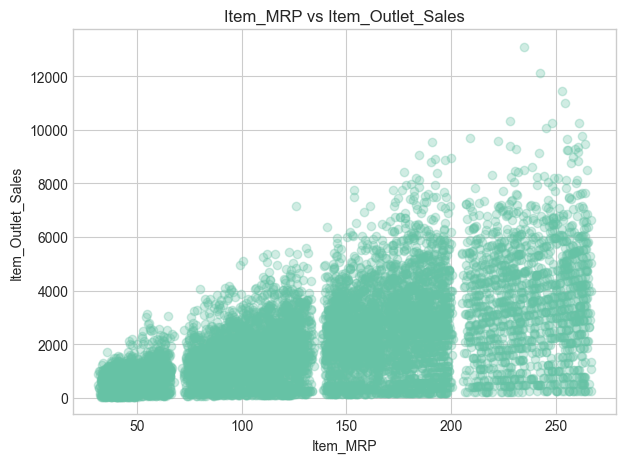

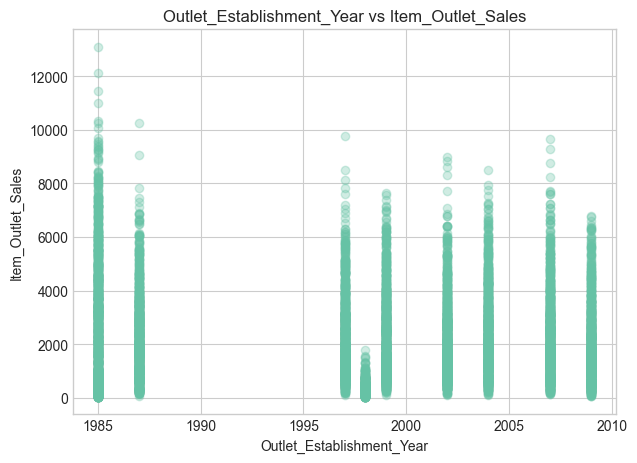

,corr_with_target
Item_Outlet_Sales,1.000000
Item_MRP,0.567574
Item_Weight,0.014123
Outlet_Establishment_Year,-0.049135
Item_Visibility,-0.128625


In [14]:
# Step 6 — Numeric features vs target (scatter) + correlations
def scatter_vs_target(df, num_col, y_col):
    x = pd.to_numeric(df[num_col], errors="coerce")
    y = pd.to_numeric(df[y_col],  errors="coerce")
    mask = x.notna() & y.notna()
    x = x[mask]; y = y[mask]
    if x.empty:
        print(f"[{num_col}] — no valid numeric pairs, skipping.")
        return
    plt.figure(figsize=(7,5))
    plt.scatter(x, y, alpha=0.3)
    plt.title(f"{num_col} vs {y_col}")
    plt.xlabel(num_col)
    plt.ylabel(y_col)
    plt.show()

# Scatter per numeric
for col in numeric_cols:
    scatter_vs_target(train, col, target_col)

# Correlation with target
corrs = train[numeric_cols + [target_col]].corr(numeric_only=True)[target_col].sort_values(ascending=False)
display(corrs.to_frame("corr_with_target"))


,count,mean,median,std
Item_Identifier,,,,
FDR45,4,6035.310550,5617.0217,2022.293557
NCL42,3,5962.017067,5635.3312,565.836519
FDU55,4,5922.457450,5987.5394,3141.061052
FDZ50,2,5512.824000,5512.8240,779.631047
DRK23,5,5464.886400,4554.0720,1881.438181
FDF39,4,5457.063250,4602.3425,3384.146824
FDD44,6,5453.900700,5153.2920,1917.250875
FDT16,5,5414.818240,4685.9004,2011.442924
FDY55,8,5332.725100,5525.4742,3307.634034


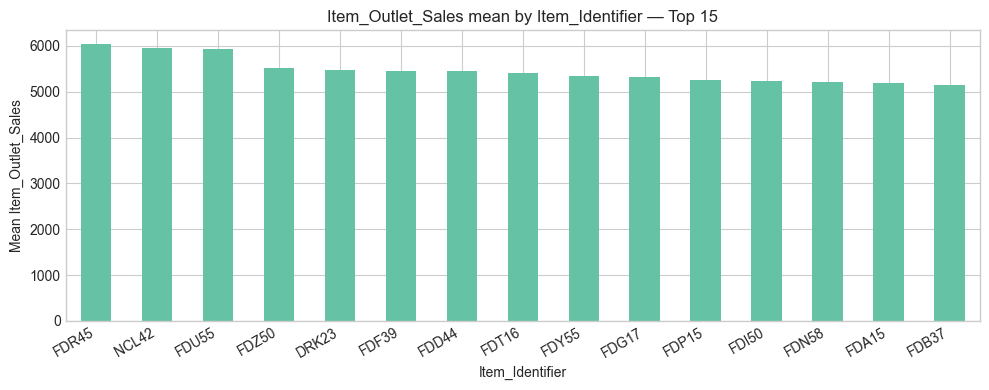

,count,mean,median,std
Item_Fat_Content,,,,
Regular,2889,2235.186702,1845.5976,1727.715941
Low Fat,5089,2164.477336,1765.7016,1706.599391
low fat,112,2087.740737,1614.2321,1747.723146
LF,316,2073.551928,1797.6600,1535.282582
reg,117,1962.192268,1492.7236,1543.170658


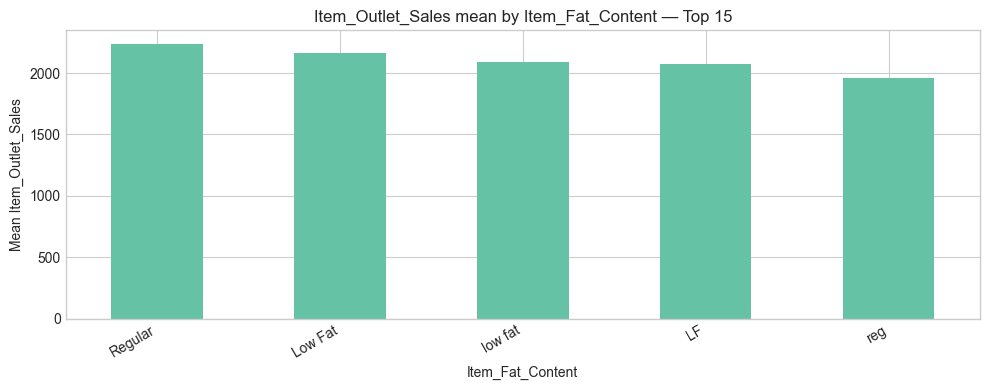

,count,mean,median,std
Item_Type,,,,
Starchy Foods,148,2374.332773,1968.1048,1773.945328
Seafood,64,2326.065928,2055.3246,1842.988719
Fruits and Vegetables,1232,2289.009592,1830.9500,1799.503459
Snack Foods,1200,2277.321739,1944.1360,1705.121755
Household,910,2258.784300,1981.4208,1692.245757
Dairy,682,2232.542597,1650.8511,1884.404698
Canned,649,2225.194904,1860.2452,1645.235638
Breads,251,2204.132226,1860.2452,1644.235914
Meat,425,2158.977911,1829.6184,1695.231081


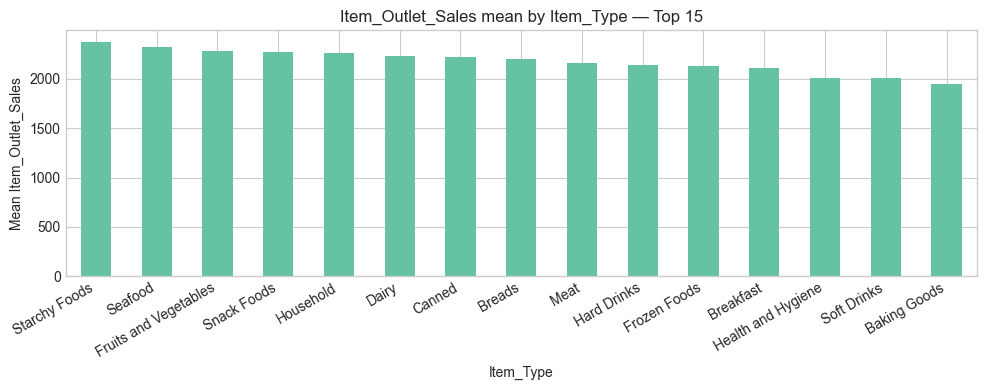

,count,mean,median,std
Outlet_Identifier,,,,
OUT027,935,3694.038558,3364.9532,2127.760054
OUT035,930,2438.841866,2109.2544,1538.512533
OUT049,930,2348.354635,1966.1074,1513.289464
OUT017,926,2340.675263,2005.0567,1550.778025
OUT013,932,2298.995256,2050.6640,1533.531664
OUT046,930,2277.844267,1945.8005,1488.405631
OUT045,929,2192.384798,1834.9448,1462.399658
OUT018,928,1995.498739,1655.1788,1375.932889
OUT019,528,340.329723,265.3213,249.979449


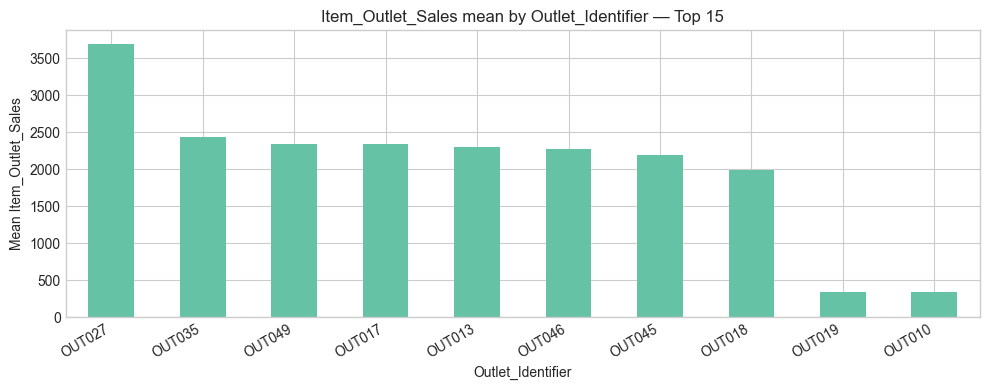

,count,mean,median,std
Outlet_Size,,,,
Medium,2793,2681.603542,2251.0698,1855.210528
High,932,2298.995256,2050.6640,1533.531664
Small,2388,1912.149161,1544.6560,1582.370364


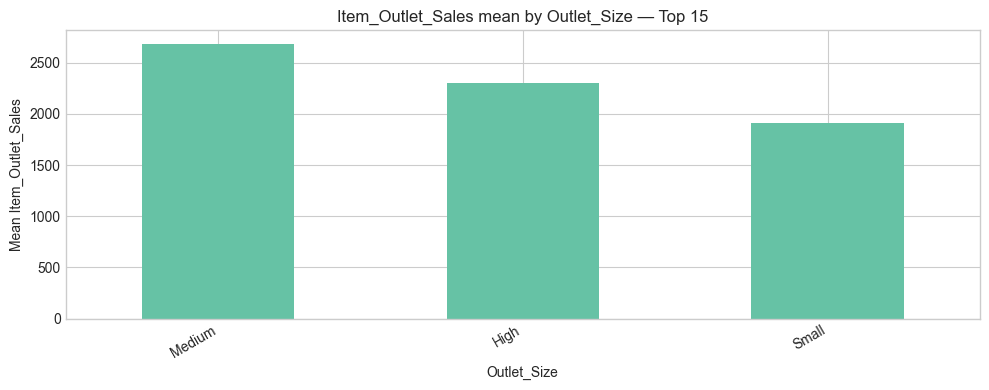

,count,mean,median,std
Outlet_Location_Type,,,,
Tier 2,2785,2323.990559,2004.0580,1520.543543
Tier 3,3350,2279.627651,1812.3076,1912.451333
Tier 1,2388,1876.909159,1487.3972,1561.649293


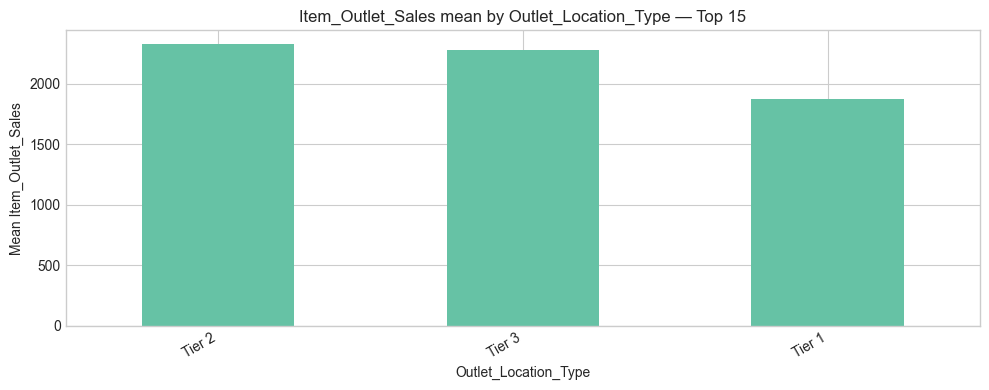

,count,mean,median,std
Outlet_Type,,,,
Supermarket Type3,935,3694.038558,3364.9532,2127.760054
Supermarket Type1,5577,2316.181148,1990.7420,1515.965558
Supermarket Type2,928,1995.498739,1655.1788,1375.932889
Grocery Store,1083,339.828500,256.9988,260.851582


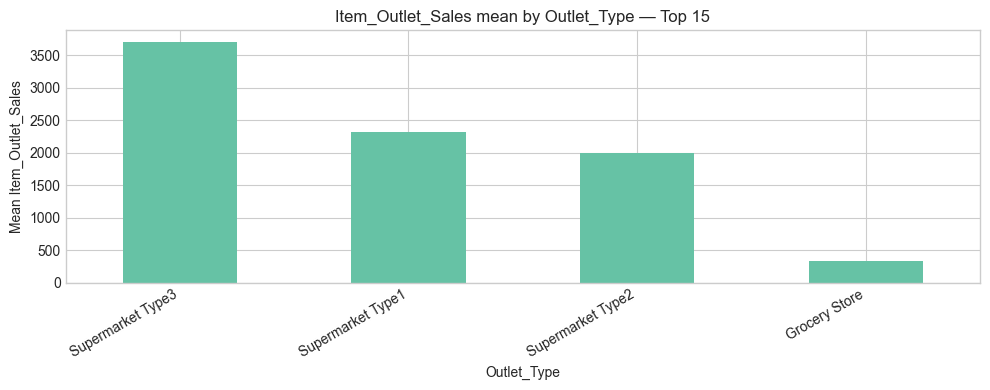

In [15]:
# Step 7 — Target by category: mean/median tables + bar charts (top categories)
def target_by_category(df, cat_col, y_col, top_n=15):
    g = (df[[cat_col, y_col]]
         .dropna(subset=[y_col])
         .groupby(cat_col)[y_col]
         .agg(["count","mean","median","std"])
         .sort_values("mean", ascending=False))
    display(g.head(top_n))

    # Bar (top_n by mean)
    head_g = g.head(top_n)
    plt.figure(figsize=(10,4))
    head_g["mean"].plot(kind="bar")
    plt.title(f"{y_col} mean by {cat_col} — Top {top_n}")
    plt.xlabel(cat_col)
    plt.ylabel(f"Mean {y_col}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

for col in cat_cols:
    target_by_category(train, col, target_col, top_n=15)


Item_Visibility == 0 count: 526
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Identifier prefixes: {'FD': 6125, 'NC': 1599, 'DR': 799}


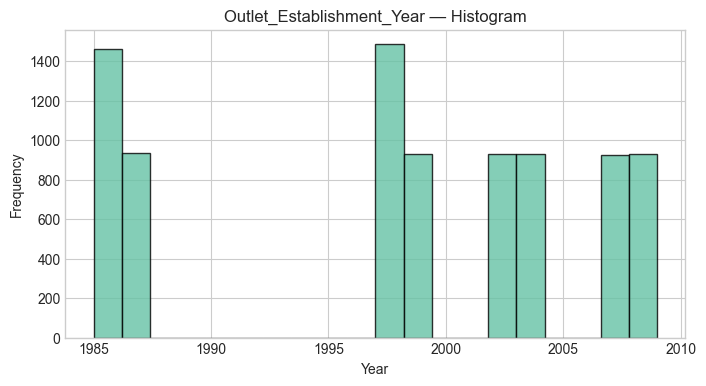

In [16]:
# Step 8 — Domain sanity checks (read-only; NO mutation yet)

# 1) Zero visibility counts (often problematic)
if "Item_Visibility" in train.columns:
    zeros = (train["Item_Visibility"]==0).sum()
    print("Item_Visibility == 0 count:", zeros)

# 2) Fat content normalization idea (observe inconsistency only)
if "Item_Fat_Content" in train.columns:
    print(train["Item_Fat_Content"].value_counts(dropna=False))

# 3) Item code prefixes (FD/DR/NC) — if Item_Identifier exists
if "Item_Identifier" in train.columns:
    prefixes = train["Item_Identifier"].astype(str).str[:2].value_counts()
    print("Item_Identifier prefixes:", dict(prefixes))

# 4) Outlet age (derive but just to *inspect* distribution)
if "Outlet_Establishment_Year" in train.columns:
    years = pd.to_numeric(train["Outlet_Establishment_Year"], errors="coerce")
    plt.figure(figsize=(8,4))
    plt.hist(years.dropna(), bins=20, edgecolor="black", alpha=0.8)
    plt.title("Outlet_Establishment_Year — Histogram")
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.show()


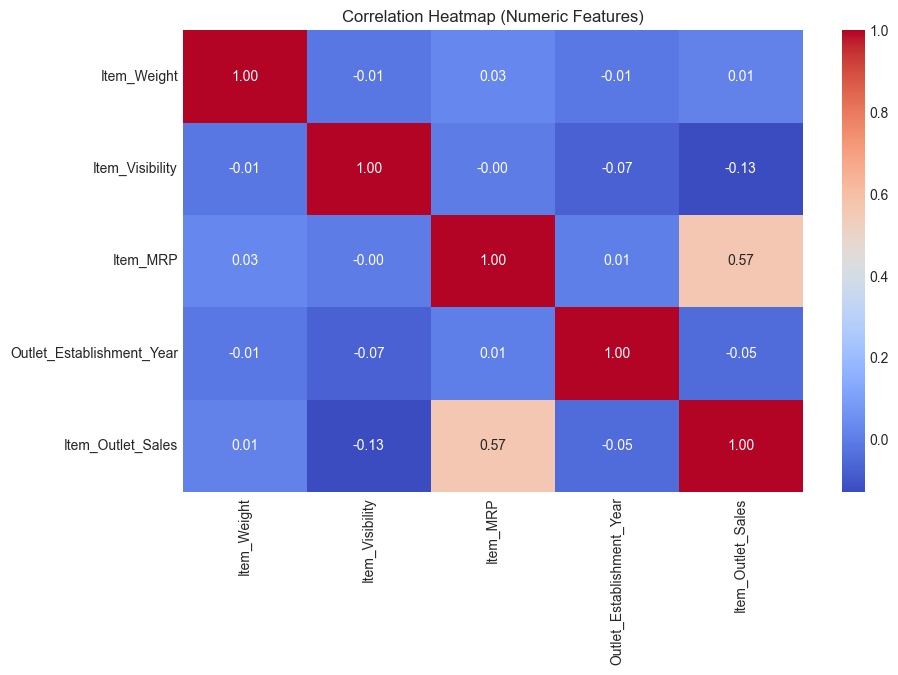


Strong Correlations (>|0.3|):

Chi-Square Test: Significant Categorical Relations (p < 0.05)
[('Item_Identifier', 'Item_Fat_Content', 0.0), ('Item_Identifier', 'Item_Type', 0.0), ('Item_Fat_Content', 'Item_Identifier', 0.0), ('Item_Fat_Content', 'Item_Type', 1.5408537629038592e-285), ('Item_Type', 'Item_Identifier', 0.0), ('Item_Type', 'Item_Fat_Content', 1.5408537629038592e-285), ('Outlet_Identifier', 'Outlet_Size', 0.0), ('Outlet_Identifier', 'Outlet_Location_Type', 0.0), ('Outlet_Identifier', 'Outlet_Type', 0.0), ('Outlet_Size', 'Outlet_Identifier', 0.0), ('Outlet_Size', 'Outlet_Location_Type', 0.0), ('Outlet_Size', 'Outlet_Type', 0.0), ('Outlet_Location_Type', 'Outlet_Identifier', 0.0), ('Outlet_Location_Type', 'Outlet_Size', 0.0), ('Outlet_Location_Type', 'Outlet_Type', 0.0), ('Outlet_Type', 'Outlet_Identifier', 0.0), ('Outlet_Type', 'Outlet_Size', 0.0), ('Outlet_Type', 'Outlet_Location_Type', 0.0)]


,Feature1,Feature2,p-value
0,Item_Identifier,Item_Fat_Content,0.000000e+00
1,Item_Identifier,Item_Type,0.000000e+00
2,Item_Fat_Content,Item_Identifier,0.000000e+00
3,Item_Fat_Content,Item_Type,1.540854e-285
4,Item_Type,Item_Identifier,0.000000e+00
5,Item_Type,Item_Fat_Content,1.540854e-285
6,Outlet_Identifier,Outlet_Size,0.000000e+00
7,Outlet_Identifier,Outlet_Location_Type,0.000000e+00
8,Outlet_Identifier,Outlet_Type,0.000000e+00
9,Outlet_Size,Outlet_Identifier,0.000000e+00


In [19]:
# ===============================
# Feature Relationship Analysis
# ===============================

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# -------------------------------
# 1. Correlation (Numeric Features)
# -------------------------------
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
corr_matrix = train[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Print strong correlations
threshold = 0.7
print("\nStrong Correlations (>|0.3|):")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]} : {corr_matrix.iloc[i, j]:.2f}")

# -------------------------------
# 2. Chi-Square (Categorical Features)
# -------------------------------
categorical_cols = train.select_dtypes(include=['object']).columns

chi_results = []
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:  # avoid self comparison
            table = pd.crosstab(train[col1], train[col2])
            if table.shape[0] > 1 and table.shape[1] > 1:  # only valid crosstabs
                chi2, p, dof, ex = chi2_contingency(table)
                if p < 0.05:  # significant relation
                    chi_results.append((col1, col2, p))

chi_df = pd.DataFrame(chi_results, columns=["Feature1", "Feature2", "p-value"]).reset_index(drop=True)

print("\nChi-Square Test: Significant Categorical Relations (p < 0.05)")
display(chi_df)
